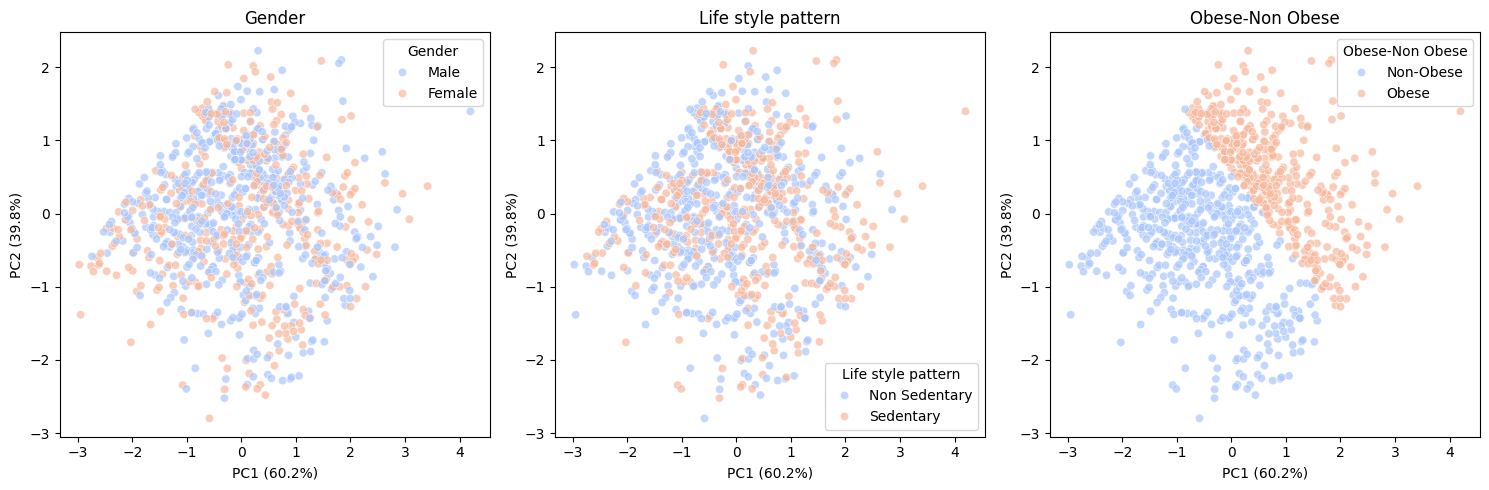

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

file_path = "/content/pan_meta.csv"  # file path
df = pd.read_csv(file_path)

df.columns = df.columns.str.strip()
numerical_cols = ["AGE  in years", "BMI"]
X = df[numerical_cols]

X_standardized = (X - X.mean()) / X.std()
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_standardized)
df_pca = pd.DataFrame(principal_components, columns=["PC1", "PC2"])

# Labellin
categorical_vars = ["Gender", "Life style pattern", "Obese-Non Obese"]
df_pca[categorical_vars] = df[categorical_vars]

# PCA results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, category in enumerate(categorical_vars):
    sns.scatterplot(ax=axes[i], x="PC1", y="PC2", hue=df_pca[category], alpha=0.7, palette="coolwarm", data=df_pca)
    axes[i].set_title(category)
    axes[i].set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
    axes[i].set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
#File Path
file_path = '/content/pan_otutab.csv'
csv_data = pd.read_csv(file_path)

csv_data.head()


,OTU_ID,Subject-1067,Subject-1090,Subject-2032,Subject-2065,Subject-3026,Subject-3061,Subject-4010,Subject-4027,Subject-5003,...,Subject-13029,Subject-1034,Subject-11023,Subject-13030,Subject-1035,Subject-1006,Subject-1013,Subject-1014,Subject-1007,Subject-1036
0,otu000001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,otu000002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,otu000003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,otu000004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,otu000005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.preprocessing import StandardScaler
#Data Scalin
scaler = StandardScaler()
scaled_data = scaler.fit_transform(csv_data)


ValueError: could not convert string to float: 'otu000001'

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Appliying the elbow method results
n_clusters = 3

kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(scaled_data)

labels = kmeans.labels_

# Visualizashun
if scaled_data.shape[1] == 2:
    plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=labels)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s=200, c='red')
    plt.show()


NameError: name 'scaled_data' is not defined

In [ ]:
from sklearn.cluster import DBSCAN

eps = 0.5
min_samples = 10

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan.fit(scaled_data)
labels = dbscan.labels_

if scaled_data.shape[1] == 2:
    plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=labels)
    plt.show()


NameError: name 'scaled_data' is not defined